# Importação de bibliotecas

In [9]:
pip install tensorflow

Forma dos dados de treino: (60000, 28, 28)
Forma dos rótulos de treino: (60000, 10)
Forma dos dados de teste: (10000, 28, 28)
Forma dos rótulos de teste: (10000, 10)


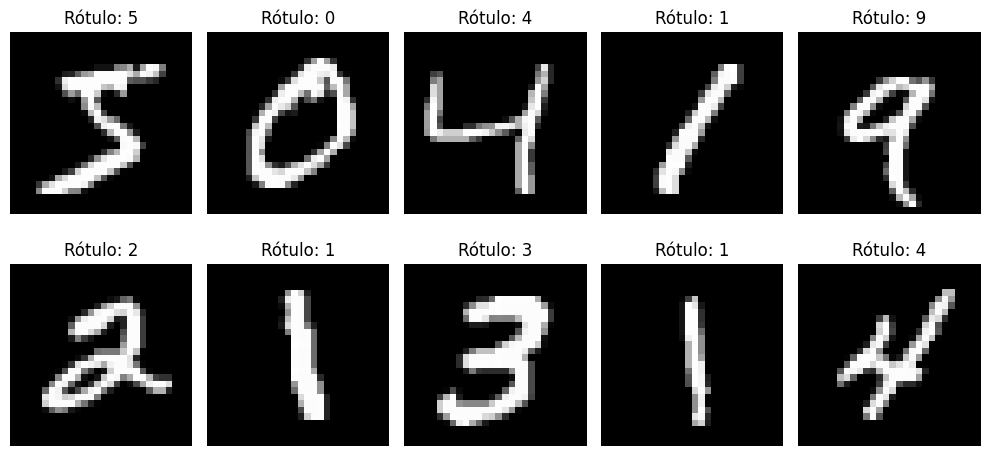

In [10]:
# Importar bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
import time
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Definir semente aleatória para reprodutibilidade
np.random.seed(47)
tf.random.set_seed(47)

# Carregar o conjunto de dados MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalizar os dados
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Converter rótulos para o formato categórico (one-hot encoding)
y_train_categorical = to_categorical(y_train, 10)
y_test_categorical = to_categorical(y_test, 10)

# Imprimir o formato dos dados
print(f"Forma dos dados de treino: {X_train.shape}")
print(f"Forma dos rótulos de treino: {y_train_categorical.shape}")
print(f"Forma dos dados de teste: {X_test.shape}")
print(f"Forma dos rótulos de teste: {y_test_categorical.shape}")

# Visualização de alguns dos exemplos de treino que serão impressos abaixo
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Rótulo: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Definições de Funções

In [11]:
def create_model():
    """
    Criar um modelo de rede neural sem ruído Gaussiano

    Retorna:
    - model: Modelo Keras compilado
    """
    model = Sequential([
        # Achata as imagens 28x28 em um array 1D
        Flatten(input_shape=(28, 28)),

        # Primeira camada oculta
        Dense(128, activation='relu'),
        Dropout(0.3),

        # Segunda camada oculta
        Dense(64, activation='relu'),
        Dropout(0.2),

        # Camada final (de saída) - 10 nós para dígitos de 0 a 9
        Dense(10, activation='softmax')
    ])

    # Taxa de aprendizado explícita para o otimizador Adam
    learning_rate = 0.001

    # Compilamento do modelo com taxa de aprendizado explícita
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

def train_and_evaluate_model(batch_size, epochs=10):
    """
    Treinar um modelo com o tamanho de lote especificado e avaliá-lo

    Parâmetros:
    - batch_size: Tamanho dos lotes para o treinamento
    - epochs: Número de épocas de treinamento

    Retorna:
    - model: Modelo treinado
    - history: Histórico do treinamento
    - training_time: Tempo de treinamento
    """
    print(f"Treinando com tamanho de lote: {batch_size}")

    # Cria o modelo
    model = create_model()

    # Mede o tempo de treinamento
    start_time = time.time()

    # O Treinamento do modelo em si
    history = model.fit(
        X_train, y_train_categorical,
        batch_size=batch_size,
        epochs=epochs,
        validation_split=0.1,
        verbose=1
    )

    training_time = time.time() - start_time
    print(f"Tempo de treinamento: {training_time:.2f} segundos")

    # Avaliação do modelo nos dados de teste
    test_loss, test_acc = model.evaluate(X_test, y_test_categorical, verbose=0)
    print(f"Acurácia no teste: {test_acc:.4f}")

    return model, history, training_time

def plot_learning_curves(histories, batch_sizes):
    """
    Plota as curvas de aprendizado para diferentes tamanhos de lote - apenas dados de treinamento

    Parâmetros:
    - histories: Lista de históricos de treinamento
    - batch_sizes: Lista dos tamanhos de lote usados
    """
    plt.figure(figsize=(12, 5))

    # Plota a acurácia de treinamento
    plt.subplot(1, 2, 1)
    for i, history in enumerate(histories):
        plt.plot(history.history['accuracy'], label=f'Batch {batch_sizes[i]}')

    plt.title('Acurácia do Treinamento do Modelo')
    plt.ylabel('Acurácia')
    plt.xlabel('Época')
    plt.legend()

    # Plota a perda de treinamento
    plt.subplot(1, 2, 2)
    for i, history in enumerate(histories):
        plt.plot(history.history['loss'], label=f'Batch {batch_sizes[i]}')

    plt.title('Perda do Treinamento do Modelo')
    plt.ylabel('Perda')
    plt.xlabel('Época')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Treinamento

Treinando com tamanho de lote: 16


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.8311 - loss: 0.5437 - val_accuracy: 0.9660 - val_loss: 0.1221
Epoch 2/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9389 - loss: 0.2013 - val_accuracy: 0.9725 - val_loss: 0.0958
Epoch 3/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9526 - loss: 0.1553 - val_accuracy: 0.9750 - val_loss: 0.0821
Epoch 4/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9589 - loss: 0.1367 - val_accuracy: 0.9760 - val_loss: 0.0841
Epoch 5/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9629 - loss: 0.1227 - val_accuracy: 0.9772 - val_loss: 0.0851
Epoch 6/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9662 - loss: 0.1110 - val_accuracy: 0.9778 - val_loss: 0.0795
Epoch 7/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9682 - loss: 0.1038 - val_accuracy: 0.9790 - val_loss: 0.0755
Epoch 8/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9685 - loss: 0

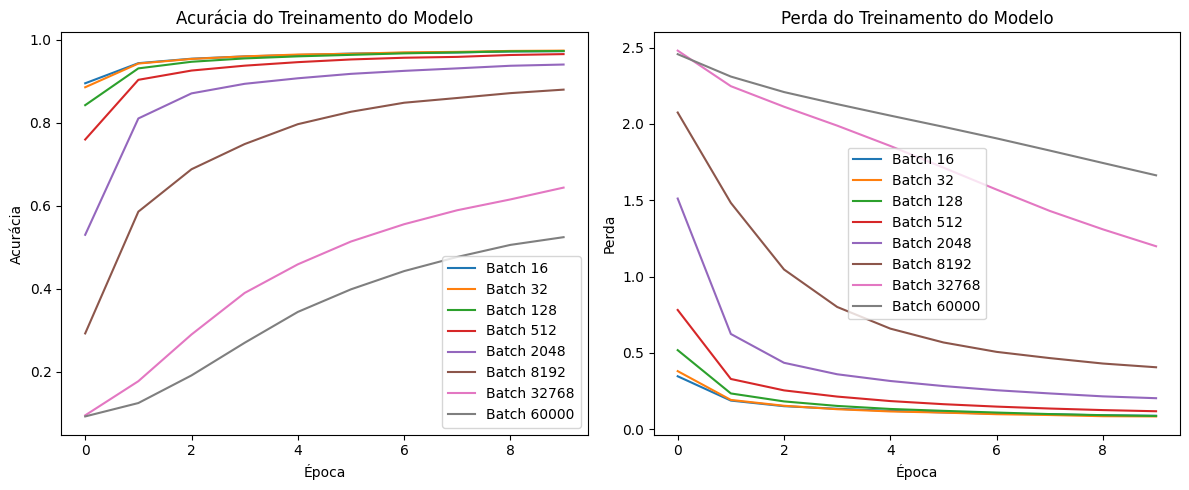

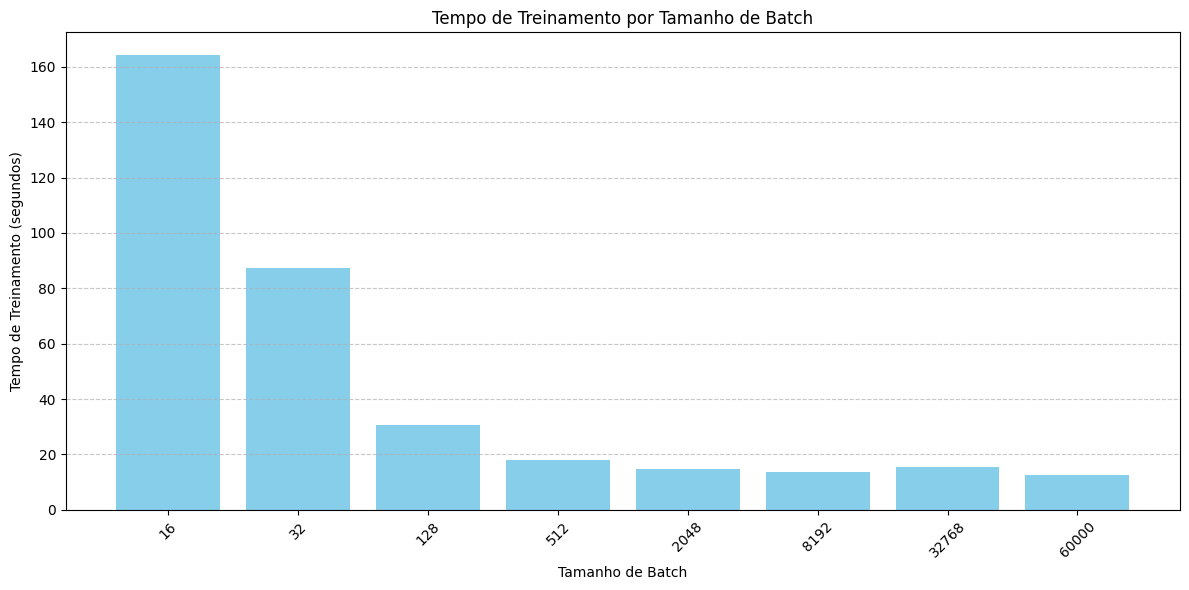

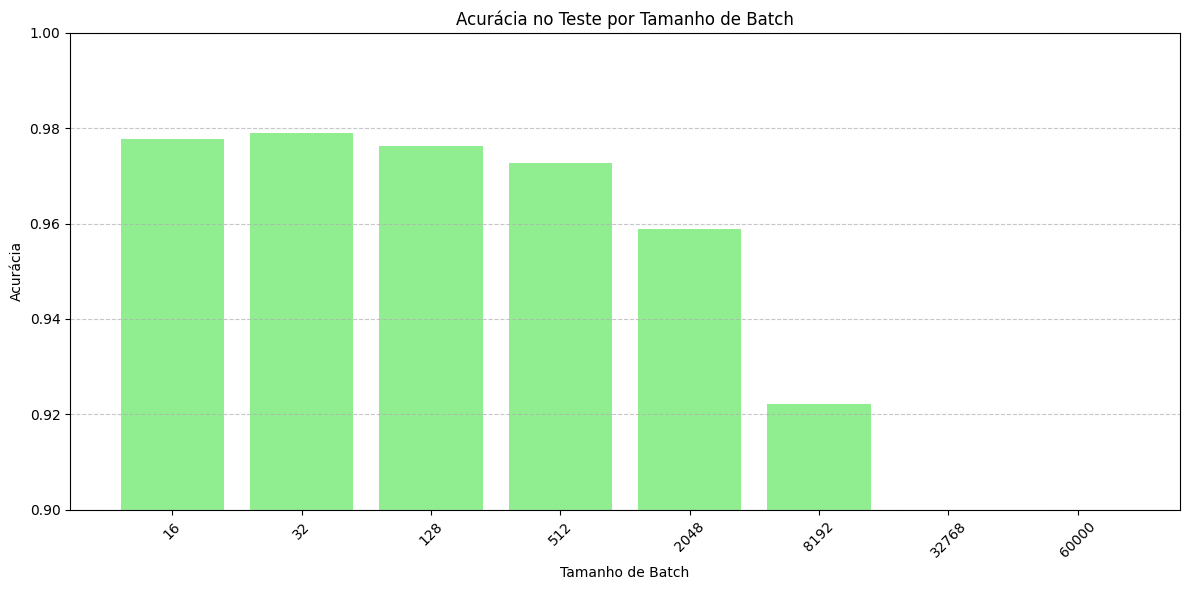

Melhor modelo usa tamanho de batch: 32
Melhor acurácia no teste: 0.9790
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


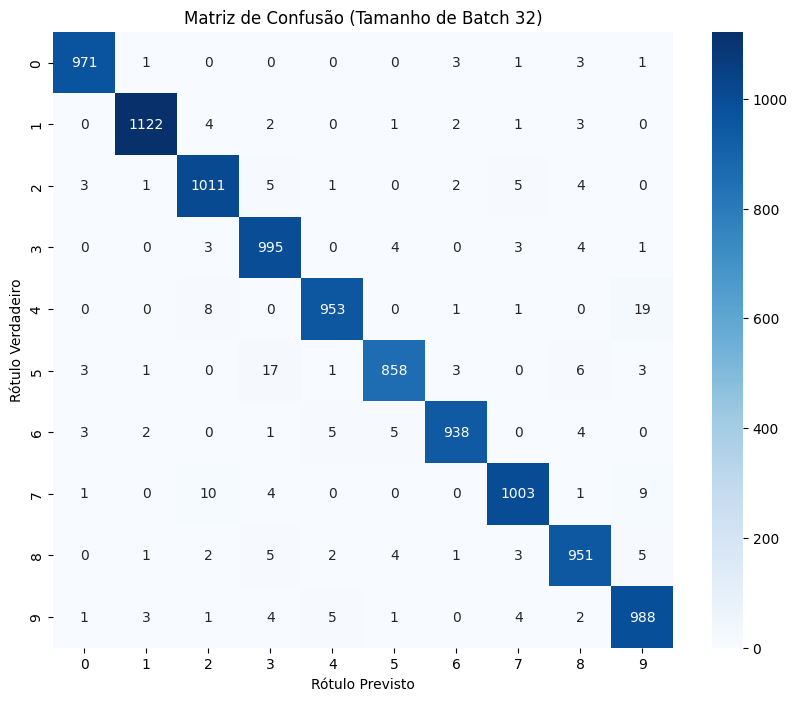


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.96      0.99      0.97      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.96      0.97       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000


Resultados da Comparação dos Tamanhos de Batch:


,Tamanho de Batch,Tempo de Treinamento (s),Acurácia no Teste,Épocas por Segundo,Passos por Época,Acurácia Final no Treinamento
0,16,164.296341,0.9777,0.060866,3750,0.971981
1,32,87.311208,0.9790,0.114533,1875,0.973278
2,128,30.677509,0.9762,0.325972,469,0.972389
3,512,17.802899,0.9728,0.561706,118,0.964889
4,2048,14.708875,0.9589,0.679862,30,0.939796
5,8192,13.786529,0.9221,0.725346,8,0.879389
6,32768,15.273597,0.8021,0.654725,2,0.643556
7,60000,12.668929,0.6595,0.789333,1,0.524222


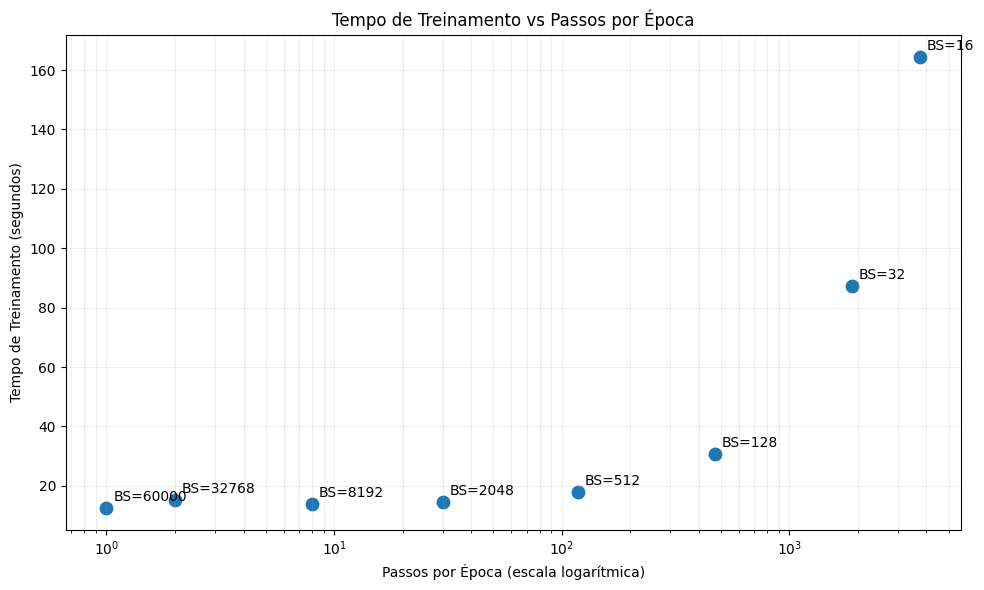

In [14]:
# Definição dos tamanhos de batch para serem comparados
batch_sizes = [16, 32, 128, 512, 2048, 8192, 32768, len(X_train)]  # O último é o batch completo (gradiente descendente)
epochs = 10

# Listas para armazenar os resultados
models = []
histories = []
training_times = []

# Treinamento dos modelos com diferentes tamanhos de batch
for batch_size in batch_sizes:
    model, history, training_time = train_and_evaluate_model(
        batch_size=batch_size,
        epochs=epochs
    )

    models.append(model)
    histories.append(history)
    training_times.append(training_time)

    print("-" * 50)

# Plota as curvas de aprendizado (apenas dados de treino)
plot_learning_curves(histories, batch_sizes)

# Compara cada um dos tempos de treinamento
plt.figure(figsize=(12, 6))
plt.bar([str(bs) for bs in batch_sizes], training_times, color='skyblue')
plt.title('Tempo de Treinamento por Tamanho de Batch')
plt.xlabel('Tamanho de Batch')
plt.ylabel('Tempo de Treinamento (segundos)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Rotaciona os rótulos para melhor visualização
plt.tight_layout()
plt.show()

# Compara a acurácia final no teste
test_accuracies = []
for i, model in enumerate(models):
    _, test_acc = model.evaluate(X_test, y_test_categorical, verbose=0)
    test_accuracies.append(test_acc)

plt.figure(figsize=(12, 6))
plt.bar([str(bs) for bs in batch_sizes], test_accuracies, color='lightgreen')
plt.title('Acurácia no Teste por Tamanho de Batch')
plt.xlabel('Tamanho de Batch')
plt.ylabel('Acurácia')
plt.ylim(0.9, 1.0)  # Ajusta conforme necessário com base nos resultados
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Rotacionar os rótulos para melhor visualização
plt.tight_layout()
plt.show()

# Seleciona o melhor modelo se baseado nas acurácias de testes esncontradas de cada um dos Batchs
best_model_idx = np.argmax(test_accuracies)
best_model = models[best_model_idx]
best_batch_size = batch_sizes[best_model_idx]

print(f"Melhor modelo usa tamanho de batch: {best_batch_size}")
print(f"Melhor acurácia no teste: {test_accuracies[best_model_idx]:.4f}")

# Gera previsões para a matriz de confusão
y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Cria a matriz de confusão
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Matriz de Confusão (Tamanho de Batch {best_batch_size})')
plt.xlabel('Rótulo Previsto')
plt.ylabel('Rótulo Verdadeiro')
plt.show()

# Imprime o relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_classes))

# Cria uma tabela comparando os tamanhos de batch
import pandas as pd
from IPython.display import display

# Cria o DataFrame para comparação
results_df = pd.DataFrame({
    'Tamanho de Batch': batch_sizes,
    'Tempo de Treinamento (s)': training_times,
    'Acurácia no Teste': test_accuracies
})

# Calcular épocas por segundo para comparação
results_df['Épocas por Segundo'] = epochs / results_df['Tempo de Treinamento (s)']

# Adicionar uma coluna para passos por época
results_df['Passos por Época'] = np.ceil(len(X_train) / results_df['Tamanho de Batch']).astype(int)

# Adicionar coluna para a acurácia final no treinamento
final_train_accuracies = [history.history['accuracy'][-1] for history in histories]
results_df['Acurácia Final no Treinamento'] = final_train_accuracies

# Mostrar a tabela de resultados
print("\nResultados da Comparação dos Tamanhos de Batch:")
display(results_df)

# Também criar um gráfico comparando passos por época vs tempo de treinamento
plt.figure(figsize=(10, 6))
plt.scatter(results_df['Passos por Época'], results_df['Tempo de Treinamento (s)'], s=80)
for i, bs in enumerate(batch_sizes):
    plt.annotate(f"BS={bs}", (results_df['Passos por Época'][i], results_df['Tempo de Treinamento (s)'][i]),
                 xytext=(5, 5), textcoords='offset points')
plt.title('Tempo de Treinamento vs Passos por Época')
plt.xlabel('Passos por Época (escala logarítmica)')
plt.ylabel('Tempo de Treinamento (segundos)')
plt.xscale('log')  # Usar escala logarítmica para melhor visualização
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.tight_layout()
plt.show()

# Teste do bot com ruido para acuracia

Avaliando modelo com ruído (desvio padrão = 0.1) em 5000 imagens aleatórias...
Acurácia com ruído: 0.9696 (4848 corretos de 5000)


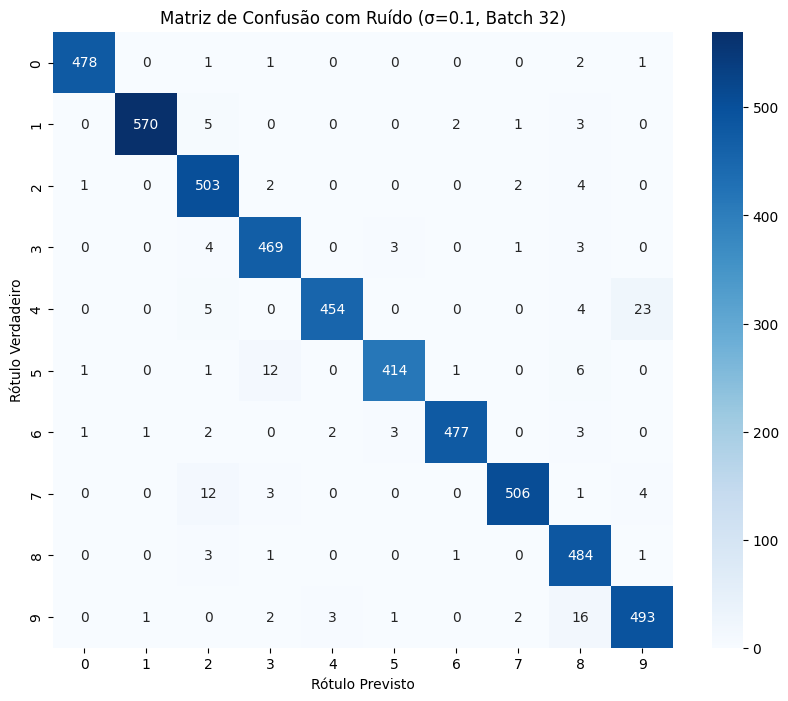


Relatório de Classificação com Ruído:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       483
           1       1.00      0.98      0.99       581
           2       0.94      0.98      0.96       512
           3       0.96      0.98      0.97       480
           4       0.99      0.93      0.96       486
           5       0.98      0.95      0.97       435
           6       0.99      0.98      0.98       489
           7       0.99      0.96      0.97       526
           8       0.92      0.99      0.95       490
           9       0.94      0.95      0.95       518

    accuracy                           0.97      5000
   macro avg       0.97      0.97      0.97      5000
weighted avg       0.97      0.97      0.97      5000



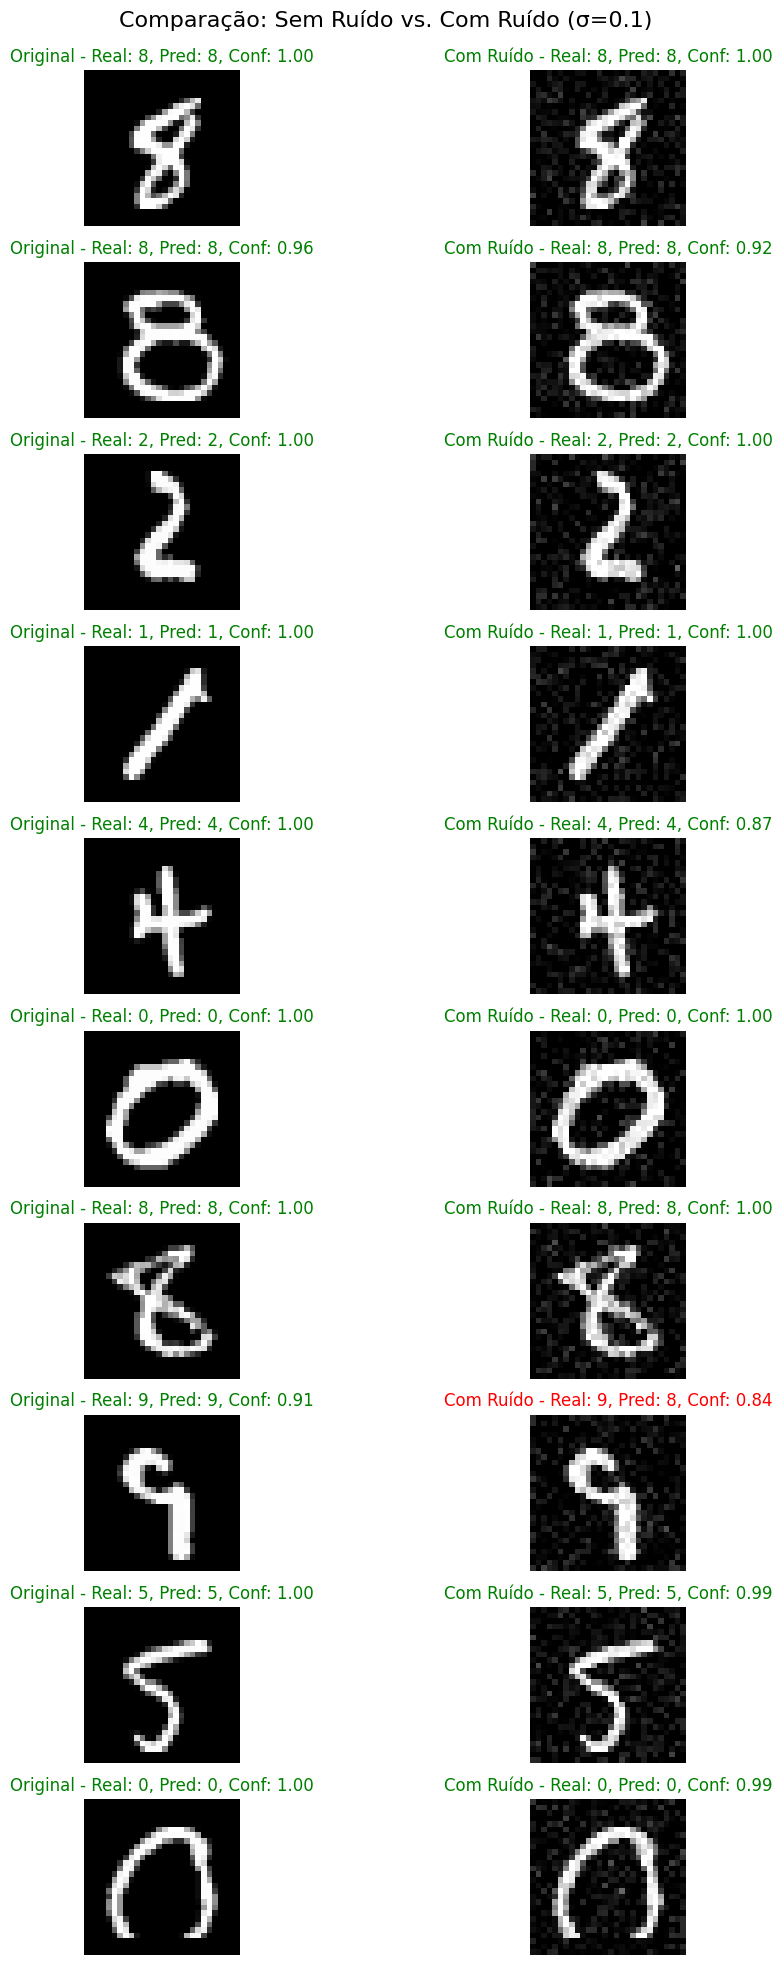


Resumo do Experimento:
Taxa de aprendizado utilizada: 0.001 (Adam)
Melhor tamanho de batch: 32
Acurácia no teste sem ruído (amostra): 0.9790
Acurácia no teste com ruído (σ=0.1): 0.9696
Amostras testadas: 5000 de 10000
Concluído! O modelo com o melhor desempenho foi analisado com e sem ruído.


In [18]:
def predict_digit_with_noise(model, image, noise_stddev=0.1):
    """
    Prevê um dígito em uma imagem com ruído adicionado

    Parâmetros:
    - model: Modelo treinado para fazer a previsão
    - image: Imagem do dígito (já normalizada)
    - noise_stddev: Desvio padrão do ruído Gaussiano

    Retorna:
    - predicted_digit: Dígito previsto
    - confidence: Confiança da previsão (probabilidade)
    """
    # Criar uma cópia da imagem
    img_copy = image.copy()

    # Adiciona o ruído Gaussiano se o desvio padrão for maior que 0
    if noise_stddev > 0:
        noise = np.random.normal(0, noise_stddev, img_copy.shape)
        img_copy = img_copy + noise
        # Garantir que os valores estejam entre 0 e 1
        img_copy = np.clip(img_copy, 0, 1)

    # Preparar a imagem para a previsão (adicionar dimensão de batch)
    img_copy = np.expand_dims(img_copy, axis=0)

    # Fazer a previsão
    predictions = model.predict(img_copy, verbose=0)

    # Obter o dígito previsto e a confiança
    predicted_digit = np.argmax(predictions[0])
    confidence = predictions[0][predicted_digit]

    return predicted_digit, confidence

# Função otimizada que avalia apenas com uma amostra aleatória
def evaluate_with_noise_sample(model, noise_stddev=0.1, sample_size=5000):
    """
    Avalia o modelo em uma amostra aleatória do conjunto de teste com ruído

    Parâmetros:
    - model: Modelo treinado para avaliar
    - noise_stddev: Desvio padrão do ruído Gaussiano
    - sample_size: Número de amostras para testar (default: 5000)

    Retorna:
    - accuracy: Acurácia na amostra do conjunto de teste com ruído
    - confusion_mat: Matriz de confusão
    - predictions: Lista de previsões para cada imagem
    """
    print(f"Avaliando modelo com ruído (desvio padrão = {noise_stddev}) em {sample_size} imagens aleatórias...")

    # Selecionar índices aleatórios
    random_indices = np.random.choice(len(X_test), sample_size, replace=False)

    # Selecionar amostras
    X_test_sample = X_test[random_indices]
    y_test_sample = y_test[random_indices]

    predictions = []
    confidences = []
    correct_count = 0

    for i in range(len(X_test_sample)):
        true_digit = y_test_sample[i]
        predicted_digit, confidence = predict_digit_with_noise(model, X_test_sample[i], noise_stddev)

        predictions.append(predicted_digit)
        confidences.append(confidence)

        if predicted_digit == true_digit:
            correct_count += 1

    accuracy = correct_count / len(X_test_sample)
    print(f"Acurácia com ruído: {accuracy:.4f} ({correct_count} corretos de {len(X_test_sample)})")

    # Criar matriz de confusão
    confusion_mat = confusion_matrix(y_test_sample, predictions)

    return accuracy, confusion_mat, predictions, confidences, random_indices

# Código para substituir a chamada da função original:

# Avalia o melhor modelo com ruído em uma amostra aleatória
noise_stddev = 0.1
sample_size = 5000
accuracy, cm_noise, predictions, confidences, random_indices = evaluate_with_noise_sample(
    best_model, noise_stddev, sample_size
)

# Visualizar a matriz de confusão com ruído
plt.figure(figsize=(10, 8))
sns.heatmap(cm_noise, annot=True, fmt='d', cmap='Blues')
plt.title(f'Matriz de Confusão com Ruído (σ={noise_stddev}, Batch {best_batch_size})')
plt.xlabel('Rótulo Previsto')
plt.ylabel('Rótulo Verdadeiro')
plt.show()

# Relatório de classificação com ruído
print("\nRelatório de Classificação com Ruído:")
print(classification_report(y_test[random_indices], predictions))

# Modificação da função para visualizar exemplos
def show_examples_with_noise(model, noise_stddev=0.1, num_examples=10, indices=None):
    """
    Mostra exemplos de imagens com e sem ruído e suas previsões

    Parâmetros:
    - model: Modelo treinado
    - noise_stddev: Desvio padrão do ruído
    - num_examples: Número de exemplos a mostrar
    - indices: Índices específicos para usar (se None, seleciona aleatoriamente)
    """
    # Selecionar índices aleatórios ou usar os fornecidos
    if indices is None:
        indices = np.random.choice(len(X_test), num_examples, replace=False)
    else:
        # Se índices foram fornecidos, selecione apenas os primeiros num_examples
        indices = indices[:num_examples]

    # Configurar o layout da figura
    fig, axes = plt.subplots(num_examples, 2, figsize=(12, 2*num_examples))  # Ajustado para melhor exibição

    for i, idx in enumerate(indices):
        # Imagem original
        original_img = X_test[idx]
        true_digit = y_test[idx]

        # Previsão na imagem original
        pred_original, conf_original = predict_digit_with_noise(model, original_img, 0)

        # Criar imagem com ruído
        noisy_img = original_img.copy()
        noise = np.random.normal(0, noise_stddev, original_img.shape)
        noisy_img = noisy_img + noise
        noisy_img = np.clip(noisy_img, 0, 1)

        # Previsão na imagem com ruído
        pred_noisy, conf_noisy = predict_digit_with_noise(model, noisy_img, 0)  # Sem adicionar ruído novamente

        # Mostrar imagem original
        axes[i, 0].imshow(original_img, cmap='gray')
        title_color = 'green' if pred_original == true_digit else 'red'
        axes[i, 0].set_title(f"Original - Real: {true_digit}, Pred: {pred_original}, Conf: {conf_original:.2f}",
                             color=title_color)
        axes[i, 0].axis('off')

        # Mostrar imagem com ruído
        axes[i, 1].imshow(noisy_img, cmap='gray')
        title_color = 'green' if pred_noisy == true_digit else 'red'
        axes[i, 1].set_title(f"Com Ruído - Real: {true_digit}, Pred: {pred_noisy}, Conf: {conf_noisy:.2f}",
                             color=title_color)
        axes[i, 1].axis('off')

    plt.tight_layout()
    plt.suptitle(f"Comparação: Sem Ruído vs. Com Ruído (σ={noise_stddev})", fontsize=16)
    plt.subplots_adjust(top=0.95)
    plt.show()

# Visualiza exemplos com e sem ruído (usando alguns dos mesmos índices já avaliados)
show_examples_with_noise(best_model, noise_stddev=0.1, num_examples=10, indices=random_indices)

# Mostra informações finais
print("\nResumo do Experimento:")
print(f"Taxa de aprendizado utilizada: 0.001 (Adam)")
print(f"Melhor tamanho de batch: {best_batch_size}")
print(f"Acurácia no teste sem ruído (amostra): {test_accuracies[best_model_idx]:.4f}")
print(f"Acurácia no teste com ruído (σ={noise_stddev}): {accuracy:.4f}")
print(f"Amostras testadas: {sample_size} de {len(X_test)}")
print("Concluído! O modelo com o melhor desempenho foi analisado com e sem ruído.")